<a href="https://colab.research.google.com/github/ShKSGithub/Multi_linear_regression-Comprehensive-way-of-implementation/blob/main/Bouston_house_price_prediction_using_Multi_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bouston house price prediction using linear regression**

### **Import dependencies**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### **Import Dataset**

In [100]:
# Load the boston housing dataset from sklearn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# Keys of boston data set
print('Boston dataset Keys:\n',boston_dataset.keys())

print('-'*100)

# Features of boston dataset
print('Boston dataset features names:\n',boston_dataset.feature_names)

print('-'*100)

# Description of boston dataset
print('Boston dataset description:\n',boston_dataset.DESCR)

print('-'*100)

# Print dataset
print('Boston dataset:\n',boston_dataset)


Boston dataset Keys:
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
----------------------------------------------------------------------------------------------------
Boston dataset features names:
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
----------------------------------------------------------------------------------------------------
Boston dataset description:
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract b

### **Dataframe transformation and functions on dataset**

In [101]:
# Transform the dataset into dataframe

# "Data"  is the independent or xi variable
df_x = pd.DataFrame(boston_dataset.data , columns = boston_dataset.feature_names)

# "Target" mean y or dependent variable
df_y = pd.DataFrame(boston_dataset.target, columns=['Price'])

print('Independent variables dataframe:\n',df_x.head(), '\n','-'*80)

print('Dependent variable dataframe:')
df_y.head()

Independent variables dataframe:
       CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns] 
 --------------------------------------------------------------------------------
Dependent variable dataframe:


,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [102]:
#  y = m(i)x(i) + b

# Independent variables dataframe information
print("Information about independent variable('X') dataframe:\n",df_x.info())

print('-'*100)

# Summary statistics
display('Summary statistics of dataframe:',df_x.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
Information about independent variable('X') dataframe:
 None
----------------------------------------------------------------------------------------------------


'Summary statistics of dataframe:'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [103]:
# Dependent variable dataframe infromation
print("Information about dependent variable('Y') dataframe:\n",df_y.info())

print('-'*100)

# Summary statistics
display('Summary statistics of dataframe:',df_y.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB
Information about dependent variable('Y') dataframe:
 None
----------------------------------------------------------------------------------------------------


'Summary statistics of dataframe:'

,Price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


### **Data distribution of data frames (Dataset):**

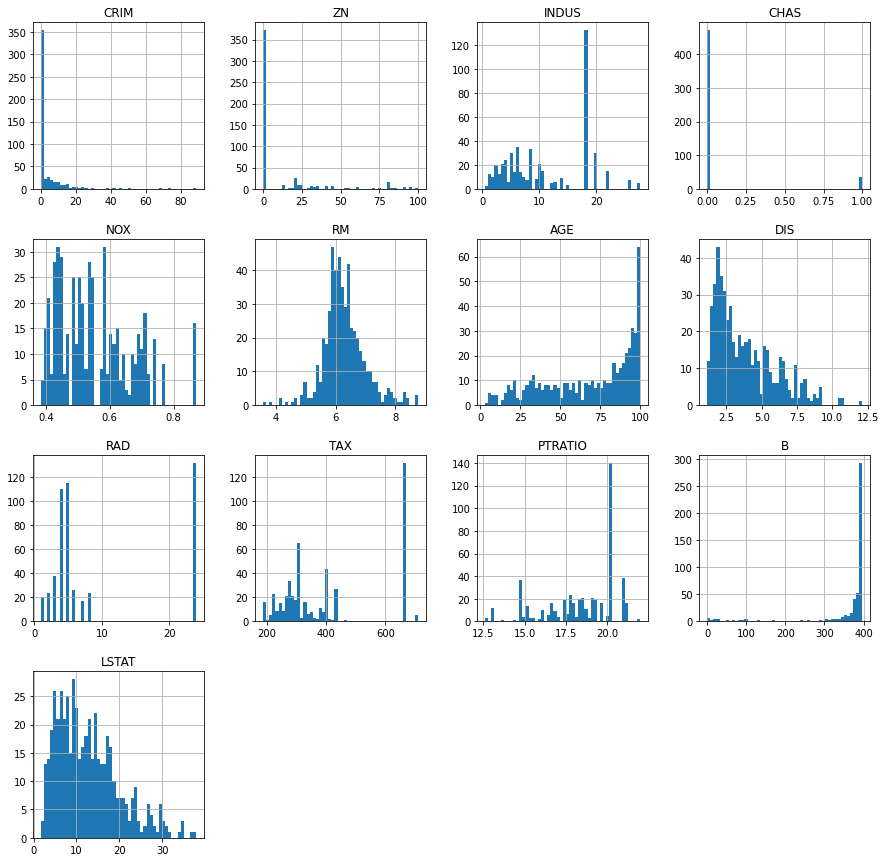

In [104]:
df_x.hist(bins=50, figsize=(15,15))
plt.show()

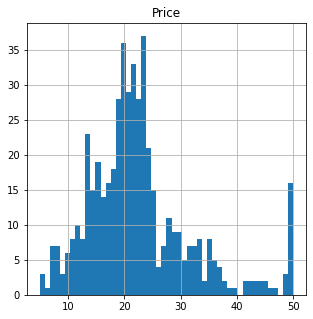

In [105]:
df_y.hist(bins=50,figsize=(5,5))
plt.show()

### **Model Fitting**

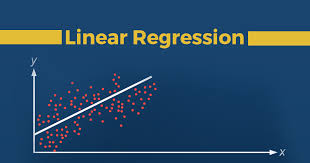

In [106]:
# Initialize the linear regression model
model = linear_model.LinearRegression()

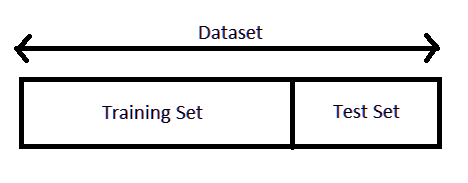

In [107]:
# Split the data into 67% training and 33% testing data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size= 0.33, random_state= 100)

#### **Standardization (Optional)**
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.

In [108]:
# Standardization
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test  = scaler.transform(x_test)

In [109]:
x_train[:2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
271,0.16211,20.0,6.96,0.0,0.464,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57


#### Normalization (Optional)
Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range.

In [110]:
# # Normalization
# normalizer = Normalizer()
# x_train = normalizer.fit_transform(x_train)
# x_test  = normalizer.transform(x_test)

In [111]:
x_train[:2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
271,0.16211,20.0,6.96,0.0,0.464,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57


In [112]:
print('X_train shape:\n', x_train.shape, '\n','-' * 80)
print('Y_train shape:\n', y_train.shape)

X_train shape:
 (339, 13) 
 --------------------------------------------------------------------------------
Y_train shape:
 (339, 1)


In [113]:
print('X_test shape:\n', x_test.shape, '\n','-' * 80)
print('Y_test shape:\n', y_test.shape)

X_test shape:
 (167, 13) 
 --------------------------------------------------------------------------------
Y_test shape:
 (167, 1)


In [114]:
# Train the model with our training data
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
# Print the co-efficients/weights of each column/feature of our model
print('Coefficients of each column:\n',model.coef_)  

Coefficients of each column:
 [[-7.08506031e-02  3.83545105e-02  1.64586726e-03  2.68064794e+00
  -1.40457528e+01  3.87983706e+00 -1.47321271e-02 -1.46902169e+00
   2.72037962e-01 -1.38898308e-02 -9.29309865e-01  1.06770120e-02
  -4.35484842e-01]]


In [116]:
# Coefficients in data-frame format
coefficients = model.coef_.reshape(-1,1)
pd.DataFrame(coefficients, x_test.columns, columns=['Coefficients'])

,Coefficients
CRIM,-0.070851
ZN,0.038355
INDUS,0.001646
CHAS,2.680648
NOX,-14.045753
RM,3.879837
AGE,-0.014732
DIS,-1.469022
RAD,0.272038
TAX,-0.013890


In [117]:
# Print the intercept of our model
print('Intercept value:\n',model.intercept_)

Intercept value:
 [33.93984638]


### **Prediction**

In [118]:
# Predict the values
y_pred = model.predict(x_test)

# Print the first 5 predictions of our test data
print('Prediction of values on test data:\n',y_pred[:5])

Prediction of values on test data:
 [[33.82380163]
 [31.15262645]
 [22.41043001]
 [17.90473334]
 [20.48262679]]


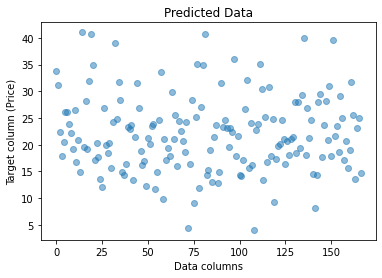

In [119]:
# Scatter plot for Predicted data
plt.plot(y_pred, 'o' , alpha = 0.5)
plt.title('Predicted Data')
plt.xlabel('Data columns')
plt.ylabel('Target column (Price)') 
plt.show()

### **Comparison with actual values**

In [120]:
# Print the actual values
print('Actual values:\n',y_test[:5])

Actual values:
      Price
198   34.6
229   31.5
502   20.6
31    14.5
315   16.2


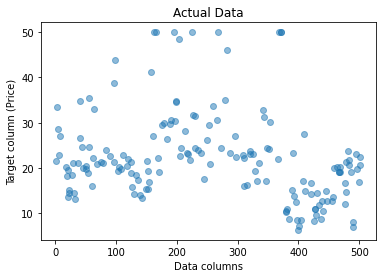

In [121]:
# Scatter plot for Actual data
plt.plot(y_test, 'o' ,alpha= 0.5)
plt.title('Actual Data')
plt.xlabel('Data columns')
plt.ylabel('Target column (Price)') 
plt.show()

### **Model Evaluation Metrics:**

#### **Mean Square Error (MSE)**

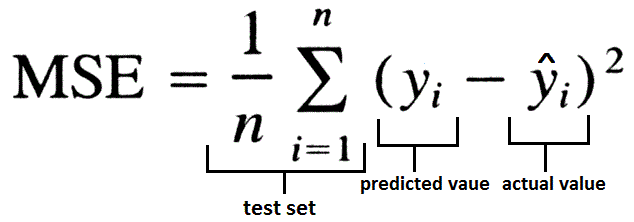

In [122]:
# Check the model performance/accuracy using mean squared error(MSE)
print(np.mean( (y_pred - y_test) **2 ) )

Price    28.914543
dtype: float64


In [123]:
# Check the model performance/accuracy by mean squared error(MSE) using sklearn.metrics
print( mean_squared_error(y_test,y_pred))

28.914542900809323


#### **R2-Score:** 
* It determine the best line is how much good overall. What is it's percentage as compare to 100%?

* R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
 
TSS(Total sum of square) = (Each item - Avg of all items)^2 



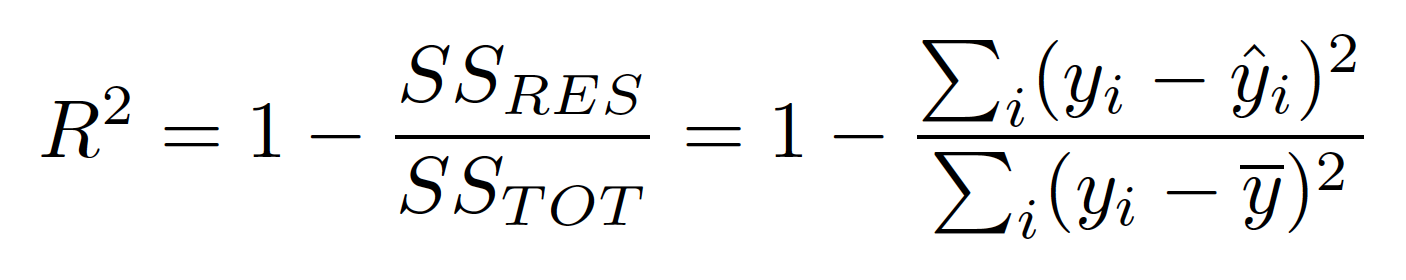

In [124]:
# Finding R2 Score 
r_score = r2_score(y_test, y_pred)
print(r_score)

0.6975641751193842


### **Features Analysis**
You can find required features by: Pvalue, Correlation and RFE(Recursive feature elimination).

#### **Correlation:**

In [125]:
# Concatenate both dataframe for visualization purpose
df_x_y = pd.concat([df_x, df_y], axis=1)
df_x_y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [126]:
# Correlation between data
columns = df_x_y.columns       # Assign column names to columns
correlation = df_x_y[columns]  # Assign data frame to correlation
correlation = correlation.corr()           # Find correlation

# Show correlation of all features with each other
display(correlation)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [127]:
# Correlation with respect to price
correlation['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

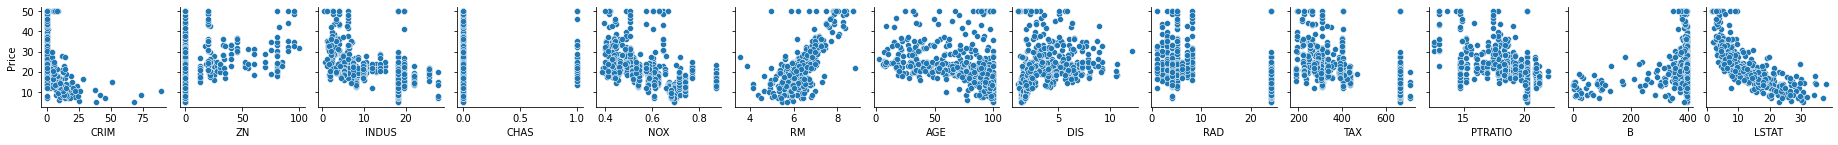

In [128]:
# Visualization of All independent variable with dependent variable column (Price)
sns.pairplot(data = df_x_y, x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',	'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars=['Price'], height= 2)
plt.show()

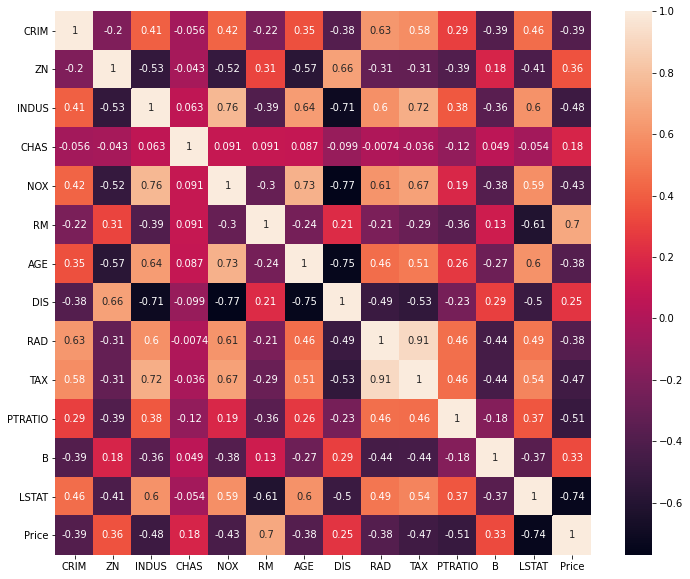

In [129]:
# Visualization of correlation matrix heatmap 
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot = True)
plt.show()

#### **RFE(Recursive feature elimination)**

In [130]:
from sklearn.feature_selection import RFE

# RFE on model with 10 features to accept
rfe = RFE(estimator = model, n_features_to_select = 10)
rfe = rfe.fit(x_train, y_train)

# RFE support(true/False)
print('RFE support:\n',rfe.support_, '\n', '-'*70)

# RFE ranking(true/False)
print('RFE ranking:\n',rfe.ranking_)

RFE support:
 [ True  True False  True  True  True False  True  True  True  True False
  True] 
 ----------------------------------------------------------------------
RFE ranking:
 [1 1 4 1 1 1 2 1 1 1 1 3 1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
# Support in data frame format
pd.DataFrame(rfe.support_,index=x_train.columns,columns=['Rank'])

,Rank
CRIM,True
ZN,True
INDUS,False
CHAS,True
NOX,True
RM,True
AGE,False
DIS,True
RAD,True
TAX,True


In [132]:
# Ranking in data frame format
pd.DataFrame(rfe.ranking_, index= x_train.columns,columns=['Rank']).sort_values(by= 'Rank',ascending= True)

,Rank
CRIM,1
ZN,1
CHAS,1
NOX,1
RM,1
DIS,1
RAD,1
TAX,1
PTRATIO,1
LSTAT,1


#### **P-value**

In [133]:
import statsmodels.api as sm

x_train_sm = x_train
x_train_sm = sm.add_constant(x_train_sm)

In [134]:
x_train.iloc[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
271,0.16211,20.0,6.96,0.0,0.464,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57
127,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,4.0,437.0,21.2,392.11,17.19
217,0.07013,0.0,13.89,0.0,0.550,6.642,85.1,3.4211,5.0,276.0,16.4,392.78,9.69
285,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23


In [135]:
# After adding constant by Stats model
x_train_sm.iloc[:5]

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
271,1.0,0.16211,20.0,6.96,0.0,0.464,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
355,1.0,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57
127,1.0,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,4.0,437.0,21.2,392.11,17.19
217,1.0,0.07013,0.0,13.89,0.0,0.550,6.642,85.1,3.4211,5.0,276.0,16.4,392.78,9.69
285,1.0,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23


In [136]:
# Ordinary least square
sm_model = sm.OLS( y_train, x_train_sm).fit()

In [137]:
sm_model.params

const      33.939846
CRIM       -0.070851
ZN          0.038355
INDUS       0.001646
CHAS        2.680648
NOX       -14.045753
RM          3.879837
AGE        -0.014732
DIS        -1.469022
RAD         0.272038
TAX        -0.013890
PTRATIO    -0.929310
B           0.010677
LSTAT      -0.435485
dtype: float64

In [138]:
# Summary of OLS
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     78.36
Date:                Thu, 04 Feb 2021   Prob (F-statistic):           8.36e-92
Time:                        06:13:35   Log-Likelihood:                -980.85
No. Observations:                 339   AIC:                             1990.
Df Residuals:                     325   BIC:                             2043.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9398      5.729      5.925      0.0

### **Features cleaning**

In [139]:
# Drop all uncessary columns in train data or that have not enough impact on our target variable
x_train_drop_col = x_train.drop(['CRIM', 'INDUS', 'AGE'], axis=1)
x_train_drop_col.head()

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
271,20.0,0.0,0.464,6.240,4.4290,3.0,223.0,18.6,396.90,6.59
355,80.0,0.0,0.413,5.936,10.5857,4.0,334.0,22.0,376.04,5.57
127,0.0,0.0,0.624,5.693,1.7883,4.0,437.0,21.2,392.11,17.19
217,0.0,0.0,0.550,6.642,3.4211,5.0,276.0,16.4,392.78,9.69
285,55.0,0.0,0.389,6.453,7.3073,1.0,300.0,15.3,394.72,8.23


In [140]:
# Drop all uncessary columns in test data or that have not enough impact on our target variable
x_test_drop_col = x_test.drop(['CRIM', 'INDUS', 'AGE'], axis=1)
x_test_drop_col.head()

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
198,80.0,0.0,0.404,7.274,7.3090,2.0,329.0,12.6,392.20,6.62
229,0.0,0.0,0.504,6.552,3.3751,8.0,307.0,17.4,380.34,3.76
502,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
31,0.0,0.0,0.538,6.072,4.1750,4.0,307.0,21.0,376.73,13.04
315,0.0,0.0,0.544,5.705,3.9450,4.0,304.0,18.4,396.42,11.50


### **Model fitting and evaluation after features reduction**

In [141]:
# Fit model on data after removing features
model.fit(x_train_drop_col,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
# Predict test data after data cleaning
y_pred = model.predict(x_test_drop_col)

In [143]:
'''
Print 'mean square error and r2 score' after features cleaning to check either removal of features effect the 
performance of model or not
'''
print('Mean Squre Error:\n',mean_squared_error(y_test, y_pred), '\n', '-' *70)

print('R2 Score:\n',r2_score(y_test, y_pred))

Mean Squre Error:
 29.507222928829812 
 ----------------------------------------------------------------------
R2 Score:
 0.691364953026213


### **Visualization of difference between ground truth and predicted values**

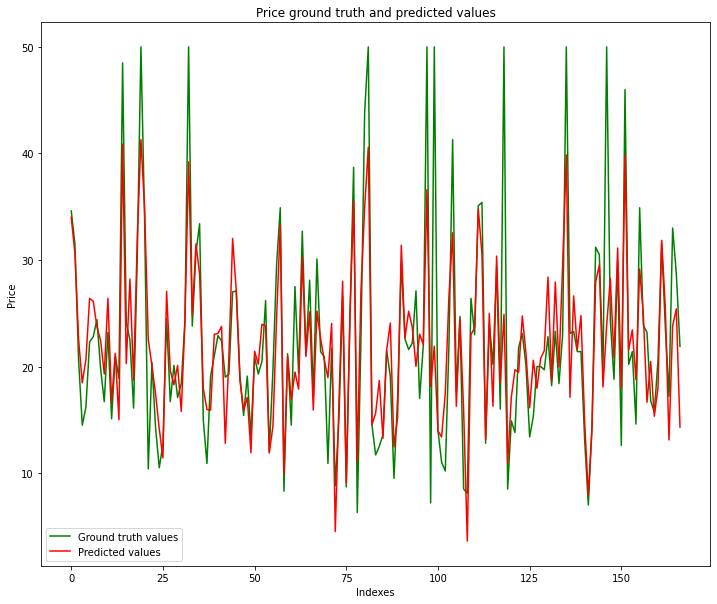

In [144]:
# Plot figure
plt.figure(figsize=(12,10))

# Specify the limit of graph x-axis
test_indexes = [text_index for text_index in range(len(y_test))]

# plotting the x and y axis with color and label
plt.plot(test_indexes, y_test, c= 'g', label= 'Ground truth values')

# plotting the x and y axis with color and label
plt.plot(test_indexes, y_pred, c='r', label= 'Predicted values')

# Title at x-axis
plt.xlabel('Indexes')

# Title at y-axis
plt.ylabel('Price')

# Plot title
plt.title('Price ground truth and predicted values')

# Labels with style/color identification
plt.legend(loc='best')

plt.show()

### **Cross Validation**
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

In [150]:
# k-fold CV 
scores = cross_val_score(model, x_train, y_train,  cv=10)
scores 

array([0.67553322, 0.51870721, 0.79052857, 0.85142293, 0.7069984 ,
       0.83035257, 0.62495195, 0.86423447, 0.57779804, 0.68267564])

### **Reference:**

[Predict Boston House Prices Using Python & Linear Regression (Video)](https://www.youtube.com/watch?v=gOXoFDrseis)

[Feature Ranking with Recursive Feature Elimination in Scikit-Learn](https://heartbeat.fritz.ai/feature-ranking-with-recursive-feature-elimination-3e22db639208)


### **Helping material:**

[Simple linear Regression](https://slideplayer.com/slide/5109869/)

[Linear Regression](https://www.slideshare.net/dessybudiyanti/simple-linier-regression)

[Predict Boston House Prices Using Python & Linear Regression](https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341)

[Statistics how to](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/#:~:text=Linear%20regression%20is%20a%20way%20to%20model%20the%20relationship%20between%20two%20variables.&text=The%20equation%20has%20the%20form,a%20is%20the%20y%2Dintercept.)

[Advantages and Disadvantages of Linear Regression](https://www.geeksforgeeks.org/ml-advantages-and-disadvantages-of-linear-regression/)

[The Disadvantages of Linear Regression](https://sciencing.com/disadvantages-linear-regression-8562780.html)

[RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE.get_params)